# 1. Beamline Elements
APRICOT currently has **Drift Tube**, **Quadrupole Magnet**, **Dipole Magnet** and **Solenoid** beamline components. In addition to these, it also allows the production of **lattice**.

In [1]:
import sys
sys.path.append('../') # to make the module directory the default directory:

import apricotbl.BeamlineComponents as blc # to create beamline component objects
import apricotbl.Beamline as bl # to define beamline component objects
import apricotbl.Functions as fn # for beam transporting
import apricotbl.Graphs as gp # to plot graphs

# Creating a beam for tutorials
ParticleTpye = "electron"   # particle type
NumberOfParticles = 10000   # Number of particles
BeamEnergy = 250e3          # beam energy (keV)
x_rms = 0.003               # RMS beam size of x (m)  
y_rms = 0.003               # RMS beam size of y (m) 
Emittance_x = 1e-6          # emittance x (mrad)
Emittance_y = 1e-6          # emittance y (mrad)
Alpha_x = -0.50             # alpha x
Alpha_y = -0.50             # alpha y

# Random beam generation
Beam = fn.RandomBeam( ParticleTpye, NumberOfParticles, BeamEnergy, x_rms, y_rms, Emittance_x, Emittance_y, Alpha_x, Alpha_y  )


Creating beam with parameters below:
        
    Particle Type           : electron
    Number of Particles     : 10000
    Beam Energy (KeV)       : 2.500e+02
    RMS x size (mm)         : 3.000e-06
    RMS y size (mm)         : 3.000e-06
    RMS z size (mm)         : 0.000e+00
    Emittance x (mrad)      : 1.000e-09
    Emittance y (mrad)      : 1.000e-09
    Alpha x                 : -5.000e-01
    Alpha y                 : -5.000e-01
    %Energy Spread          : 0.000e+00



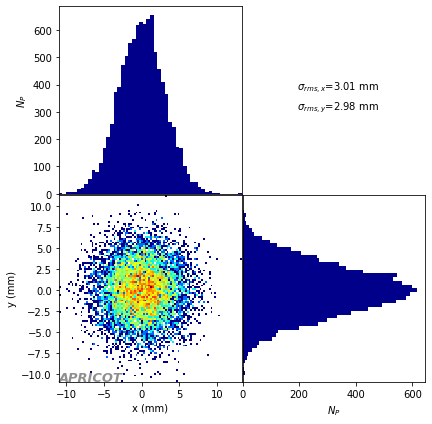

In [2]:
# Plotting initial Beam Shape in the xy-plane
gp.plotBeamShape_xy( Beam )

## 1.1. Drift Tube
The following parameters are used to create Drift Tube:

```py
Name    # Name of the element
Length  # Length of the element
```

Drift Tube object is created from the **DriftTube** class in the **BeamLineComponent** module as follows:
```py
DriftTube(Name, Length)
```

In [3]:
# Creating a Drift Tube with a length of 0.2 m
drift = blc.DriftTube("drift",0.2)

## 1.2. Quadrupole Magnet
The following parameters are used to create Quadrupole Magnet:

```py
Name      # Name of the element
Length    # Length of the element
Strength  # Strength of the element
```

Quadrupole Magnet object is created from the **QuadrupoleMagnet** class in the **BeamLineComponent** module as follows:
```py
QuadrupoleMagnet(Name, Length, Strength)
```

In [4]:
# Creating a Quadrupole Magnet with a length of 0.5 m and a power of 0.4
quad = blc.QuadrupoleMagnet("quadrupole",0.5,0.4)

# 1.3. Dipole Magnet
The following parameters are used to create Quadrupole Magnet:

```py
Name      # Name of the element
Length    # Length of the element
Angle     # Angle expected to bend
ybend     # Enter 1 to bend in the y-axis (not mandatory)
```

Quadrupole Magnet object is created from the **DipoleMagnet** class in the **BeamLineComponent** module as follows:
```py
DipoleMagnet(Name, Length, Angle, ybend)
```

In [5]:
# Creating a Dipole Magnet with a length of 0.2 m and 0.1 rad bending angle
dipole = blc.DipoleMagnet("dipole",0.2,0.1)

# 1.4. Solenoid
The following parameters are used to create Solenoid:

```py
Name      # Name of the element
Length    # Length of the element
Strength  # Strength of the element
```

Solenoid object is created from the **Solenoid** class in the **BeamLineComponent** module as follows:
```py
Solenoid(Name, Length, Strength)
```

In [6]:
# Creating a Quadrupole Magnet with a length of 0.2 m and a power of 400
sole = blc.Solenoid("solenoid",0.2,400)

# 2. Beamline
After the beamline components are defined, the beamline must be aligned. The following parameters are used to create beamline:

```py
Name      # Name of the element
Elements  # Elements in beamline (in list form, in brackets)
```

The beamline object is generated from the **BeamLine** class of the **BeamLine** module as follows:
```py
Beamline(Name, Elements)
```

In [7]:
# Single line definition
beamline = bl.Beamline( "beamline", [drift,quad,drift] )

# or
line = [drift,quad,drift]
beamline = bl.Beamline( "beamline", line )

To pass the beam in the beamline, the **TransportBeam** method from the **Functios** module is used (assume that BeamLine object is named as beamline).
```py
TransportBeam( Beam, beamline.Elements )
```
This proceeds by specifying the parameters of the beam at the end of each element. If the behavior inside the elements is also to be calculated, the step size (m) for the z-axis must be determined in the code.

```py
TransportBeam( Beam, beamline.Elements, dz )
```
**! The step length must be the exact divisor of the element lengths.** It is recommended that the minimum value of step length should be in millimeters (it can be taken down to 10 microns).

In [8]:
# Running beam on beamline
fn.TransportBeam( Beam, beamline.Elements, 0.01)

Progress:  >----------------------------------------⬮> 100.0% 


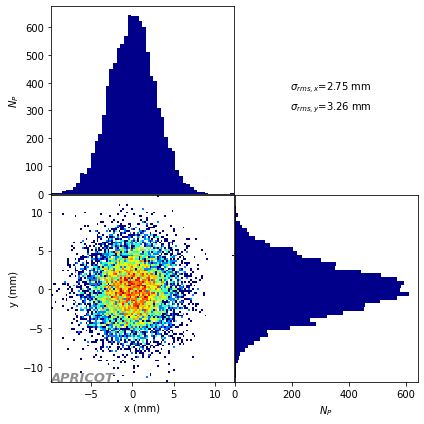

In [9]:
# Plotting final Beam Shape in the xy-plane
gp.plotBeamShape_xy( Beam )

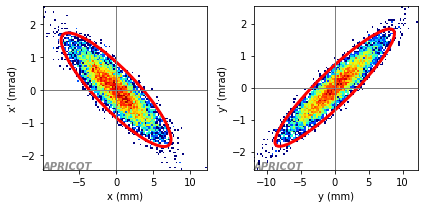

In [10]:
# Plotting Phase Space Graph
gp.plotPhaseSpace( Beam )

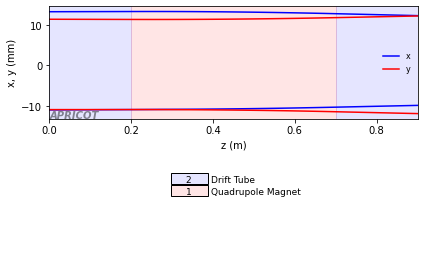

In [11]:
# Plotting Position Graph
gp.plotPositionGraph( Beam, beamline.Elements )

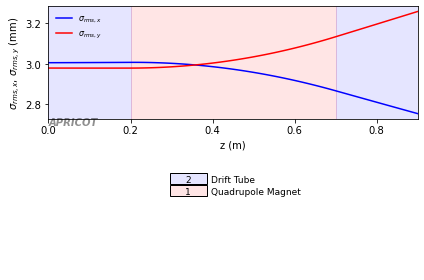

In [12]:
# Plotting Position Graph (with RMS size)
gp.plotPositionGraph_RMSsize( Beam, beamline.Elements )

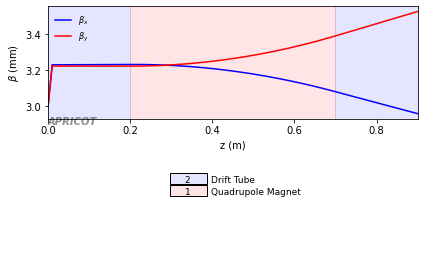

In [13]:
# Plotting Beta Function
gp.plotBetaFunctions( Beam, beamline.Elements )